# Fitting Data to Functions

## Average and Standard Deviation

Assume you have a set of data with values $\{x_i\}$, $N$ values in total, and you want to find the average value $\bar{x}$. The calculation is:
$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$
If you wanted to find the variation of your data around the average, one calculation is
$$var = \frac{1}{N}\sum_{i=1}^N (x_i-\bar{x})^2 = \sigma^2$$
where $\sigma$ is used to denote the standard deviation (which is the square root of the variance). Statisticians tend to use the variance, but physicists tend to use the standard deviation since it has the same units as the original data.
There are other ways to measure the variation of your data (like making a histogram and finding the "full width half maximum" (FWHM) from the graph) but the variance has some nice calculus properties which we will soon use.

One thing to note is that in the definition of the variance, if you did not know the value of $\bar{x}$, you could find it from the variance by finding the value of $\bar{x}$ which minimizes the variance by setting
$$\frac{\partial \, (\sigma^2)}{\partial \bar{x}} = 0$$
and solving the resulting equation. You should be able to do this in under 5 minutes if you're interested.

## Fitting Linear Functions

Assume you have a data set in the form of ${(x_i,y_i)}$ pairs of data. Presumably, you believe there's a relationship between the $x_i$ and $y_i$ values. Let's assume the relationship is in the form $y_i = f(x_i) = mx_i + b$, i.e. a linear relationship. Start by defining the reduced chi-squared $(\chi^2_{red})$ similarly to $\sigma^2$ before:
$$\chi^2_{red} = \frac{1}{N-k}\sum_{i=1}^{N} \frac{(y_i - f(x_i))^2}{(u(y_i))^2}$$
where $k$ is the number of fitting paramters used (2 for a linear function), and $u(y_i)$ are the uncertainties of $y_i$. We often define $dof=N-k$ as the number of degrees of freedom of the fitting.

This measures the variation of your data from the straight line that you've assumed should predict the data correlations. If you happen to know what $m$ and $b$ are, great. If you don't know them, you can find the "best" values by insisting they minimize the value of $\chi^2_{red}$. This is called least squares fitting, or sometimes chi-square fitting. You would calculate:
$$\frac{\partial \, (\chi^2)_{red}}{\partial m} = 0$$
$$\frac{\partial \, (\chi^2)_{red}}{\partial b} = 0$$
Or, more likely, you would use the curve_fit() algorithm from scipy to do this for you. Technically, curve_fit() uses a different algorithm to estimate the minimum $\chi^2_{red}$ value, but it is still trying to find the parameters which minimize $\chi^2_{red}$.

I note here that this is a solvable set of equations. I.e. you can write down a closed-form answer to what $m$ and $b$ are in terms of the original data. For this reason, linearizing your data and fitting it is, in principle, the best thing to do where possible.

What do you gain by including the uncertainties? If the uncertainties are all the same, it's just a constant and does not affect anything. However, if your uncertainty values are different, the data with the smallest uncertainties will have the largest impact on fitting. In a sense, this algorithm will try to make the best-fit line pass within an equal number of error-bars of each data point, so the data points with the smallest uncertainties will be closest to the best-fit line.

Note that $u(x_i)$ are not used in this fitting algorithm. You should only use curve_fit() when your $u(y_i)$ are much larger than your $u(x_i)$. If this is not the case, there are better fitting algorithms to use, but that is beyond the scope of this document.

There's no reason to restrict this to linear functions. $f(x)$ can be any function, and the same algorithm will work in theory. In practice, most functions don't have analytic solutions in the same way that linear functions do. On the other hand, the curve_fit() algorithm from scipy usually works for all of them, though it can struggle if you don't give it good initial guesses.

## What function should I use to fit my data?

If you're lucky, you have a function in mind before you started the experiment. In that case, use that function. In many cases, the function comes with a constant (perhaps a universal constant) and you're trying to confirm that constant's value. Great! But you still need to check the goodness of fit (next section) to make sure the function is correct. For one thing, some smart theorist probably derived that equation from idealized conditions which do not reflect the reality of your actual, hopefully-working equipment. 

If you don't have a function in mind before you start, you will likely need to look at your data and make a good guess. Always start with a simple function with only a few (less than 5) free parameters. Good functions include: linear, quadratic, power-law, exponential, logarithm, trig functions, normal, Poisson. If you add two exponential functions you can get asymmetric pulses and S-curves.

If you ever notice that one of your parameters is "zero" (its value is, say, no more than twice its uncertainty), you should remove that term from your fitting equation and redo the fit. All else being equal, the fewer free parameters you use in your fit the better, even if it increases your $\chi_{red}^2$ value slightly. The best fitting functions have 2 or 3 free parameters. You need high-quality data (lots of data with small uncertainties) to justify having more than, say, 5 free parameters in your fitting function unless you were given a theoretical function before you started collecting data.

## Goodness of Fit (do you have the correct function?)

Let's see what the results of this fitting algorithm should look like when things are working correctly and you have the correct fitting function. After we've done that, we'll look at what could go wrong. We assume that there are no coding problems, no Python error messages... but just because Python code produces no error messages does not mean the code does what you thought it was doing! You probably know this already, but it bears repeating: Python does what you say, not what you meant to say.

First, $\chi^2_{red}$ is dimensionless. It's basically a dimensionless measure of the standard deviation of your data with respect to the best-fit line you've proposed, given your uncertainty estimates of your data. In other words, it more or less represents the square of the average number of errorbars by which your data misses your line of best fit. If your function is correct and your uncertainties are correctly estimated, you should get $\chi^2_{red} \simeq 1$. You'll never get exactly 1; generally anything in the range of 0.9 to 1.1 is fantastic. Note that you're unlikely to be justified in reporting your $\chi^2_{red}$ value to more than 2 significant figures since the numerator of the sum in the definition of $\chi^2_{red}$ is basically your noise. In fact, we call the numerator the residuals $r_i$, i.e.
$$r_i = y_i - f(x_i).$$
If you plot $r_i(x_i)$ with errorbars, we call that plotting the residuals. Ideally, this plot should have no pattern (i.e. no discernable slope or curvature). If it does, then even if your $\chi^2_{red}$ value is close to 1 you should not believe that you have the correct fitting function. In addition, the values of $r_i$ ought to have about as many positive values as negative values, and only 68% of the values should have an errobar overlap with the $y=0$ line (which you should include in your plot). About 5% of your data points should miss $y=0$ by more than 2 errorbars. If you calculate the normalized residuals 
$$r=\frac{y_i-f(x_i)}{\sigma_i}$$ 
and plot a histogram of them, it should look like a Gaussian function with mean zero and standard deviation 1. Note that undergraduate students almost never need to do this.

Of course, this assumes that your noise is normal (Gaussian). If you know that your noise is not normal, those values (68% and 5%) will differ. But if you understand that your noise is non-Gaussian, you probably don't need to read the document, so you can likely ignore this paragraph for now. 

A better statistic to use than $\chi^2_{red}\simeq 1$ is the chi-squared probability. This calculation assumes that your best fit function is true, your uncertainties are accurate and Gaussian, and then calculates what fraction of randomly generated data sets have a larger $\chi^2_{red}$ value than your actual data. A probability of 0.5 is ideal. Higher probabilities (often over 0.9) indicate your data is too good to be true, and lower probabilities (often below 0.1) indicate something is wrong with your data and/or your fitting function. Note that a high probability corresponds to $\chi^2_{red} \ll 1$ and a low probability corresponds to $\chi^2_{red} \gg 1$.

The end of this document has some code which demonstrates the chi-squared probability.

If your data is "too good to be true" it's quite possible that you over-estimated your uncertainties. The problem with this situation is that while your function is a "good fit", there are many other functions which would be equally "good", and so you can't really say that you have the correct function. This is sometimes described as fitting your function with a really thick marker; all the lines you could draw will hit most of your data points. Re-evaluate your uncertainties, especially any that you just randomly guessed at.

If your data is "bad", it's possible that you under-estimated your uncertainties. It's also possible that this is evidence that the function you are fitting is wrong. In this case, look at your residuals plot. It should help you determine which situation is more likely. If there's a pattern, the function is wrong. If it just looks like noise, it probably is noise and you should re-evaluate your uncertainties. Start with trying to find whether you missed a big source of uncertainty.

Recap: your fit is good if $\chi^2_{red}\simeq 1$, or equivalently if your chi-squared probability is between 0.1 and 0.9, AND the residuals plot has no patterns (slope or curvature) and looks random (equally positive and negative, with a non-zero number of outliers). You should not rely on the $\chi^2_{red}$ statistic alone as it is a single quantity trying to summarize your entire data. 

## Some Examples

Let's look at some examples. After the examples there is some code which generated the following plots. I recommend you play with some of the parameters and run the code lots of times so that you can see a decent sample of good versus bad data and fits.

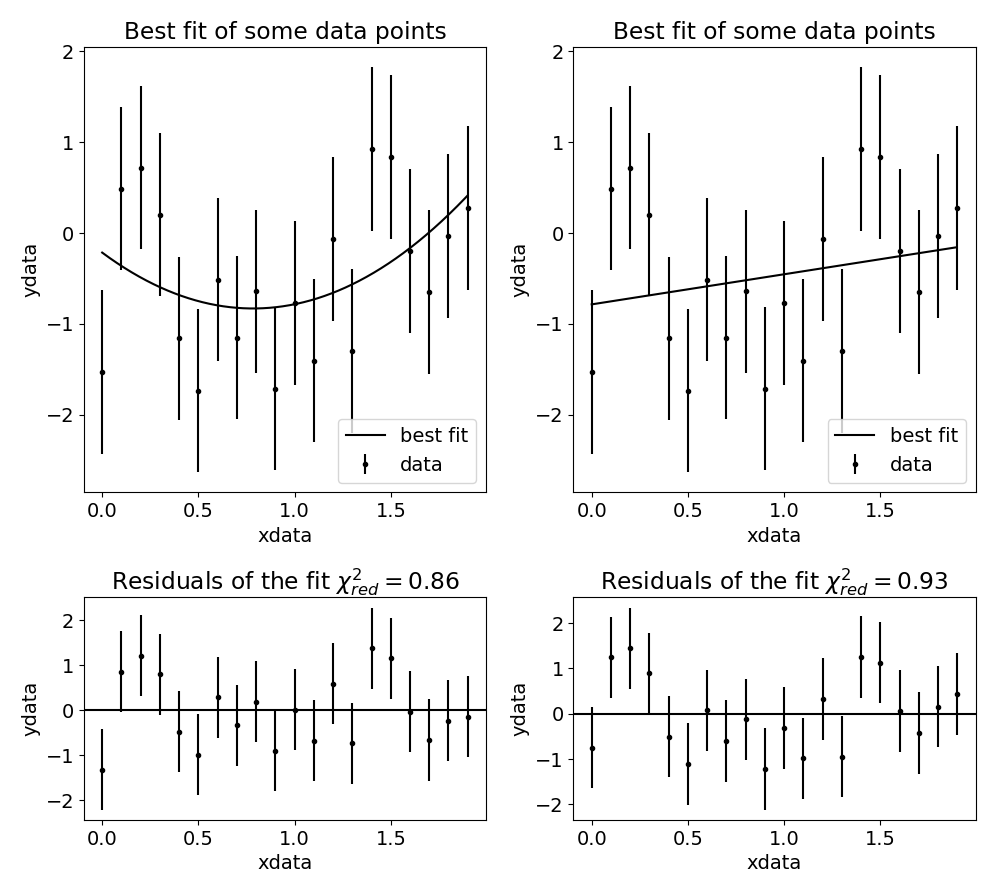

Both of these fits are "good" in the sense that the $\chi_{red}^2$ values are fine. There's a temptation to claim that the quadratic fit is "better" because it has a lower $\chi_{red}^2$ value, but the truth is that the errorbars on the data are simply too larger to unambiguously claim which function is the better fit. Note that both residuals plots look correctly random with no clear pattern.

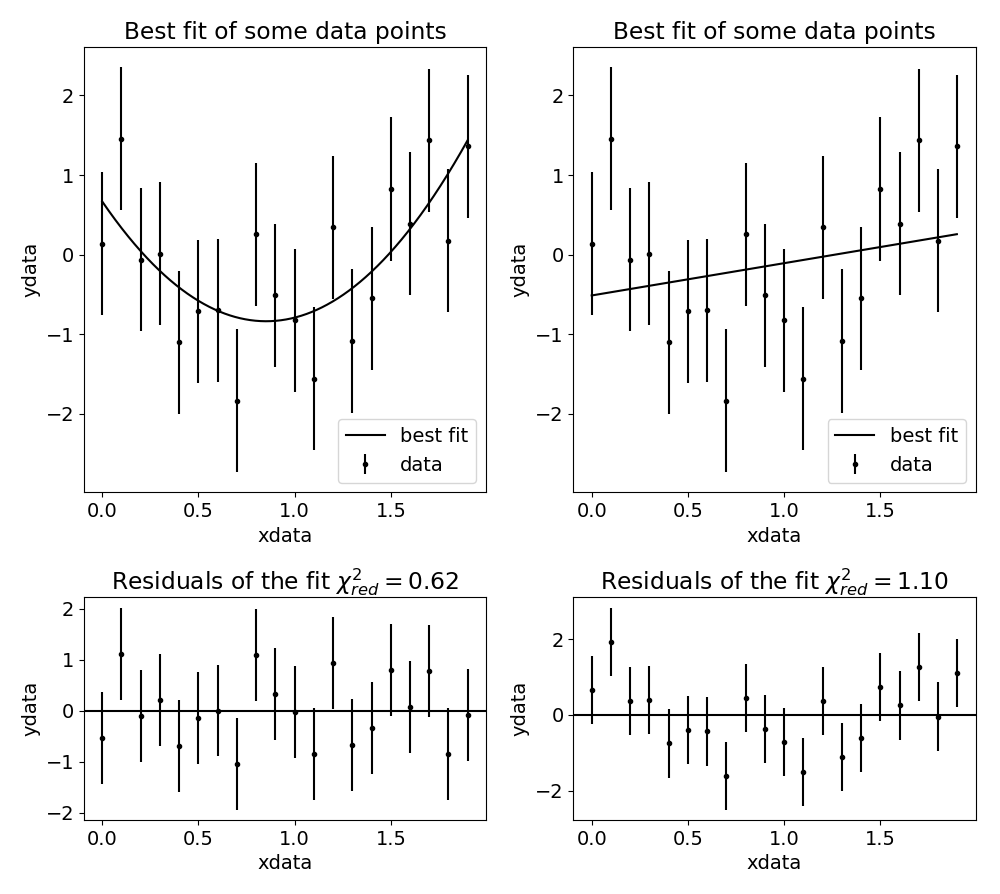

This situation is similar to the previous one, except this time the pattern in the residuals plot of the linear plot hints that the quadratic function is a better fit.

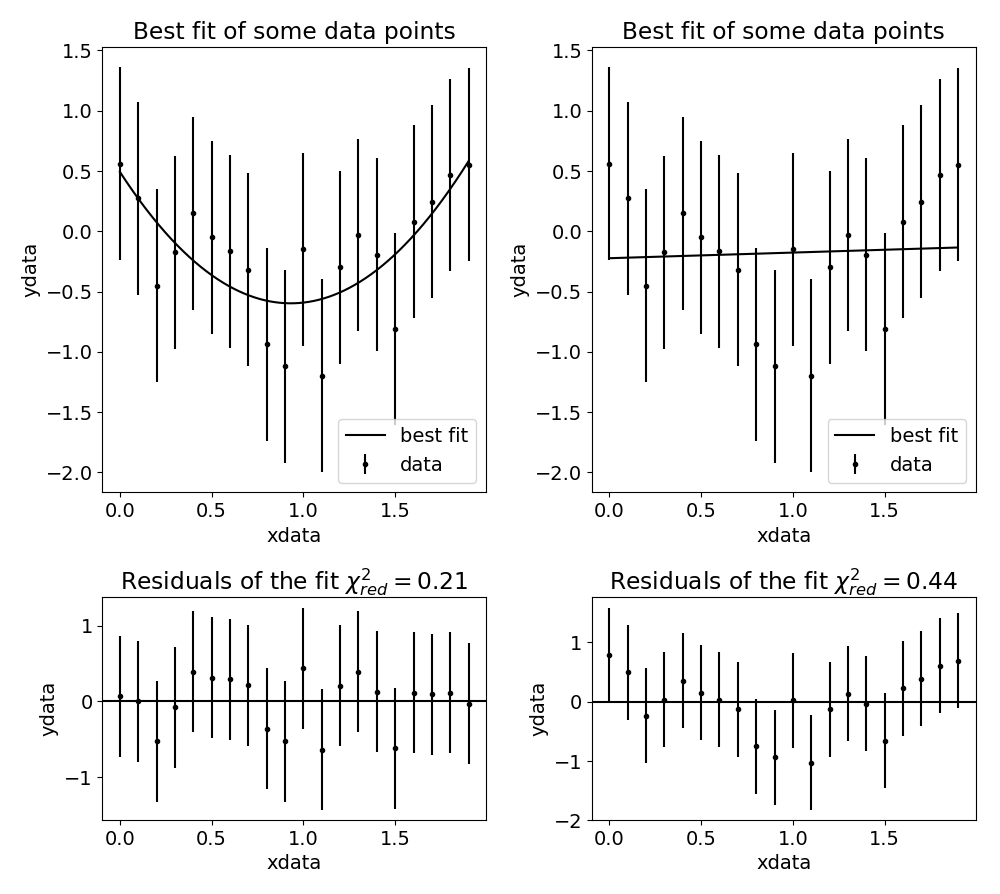

Here we have errorbars that are too large. In the code that generated the data, the data was given uncertainties, but then these values were increased by a fudge factor before doing the fitting algorithm. In this case, the $\chi_{red}^2$ values are suspiciously low, as they should be since we lied about the uncertainties. Here, based only on the $\chi_{red}^2$ values we might conclude that both fits are "good", but looking at the residual plots tells us that the data does not have "enough" scatter (left) and that there's a pattern (right). This implies that the left graph is a better fit, but that the errorbars are too large (conservative).

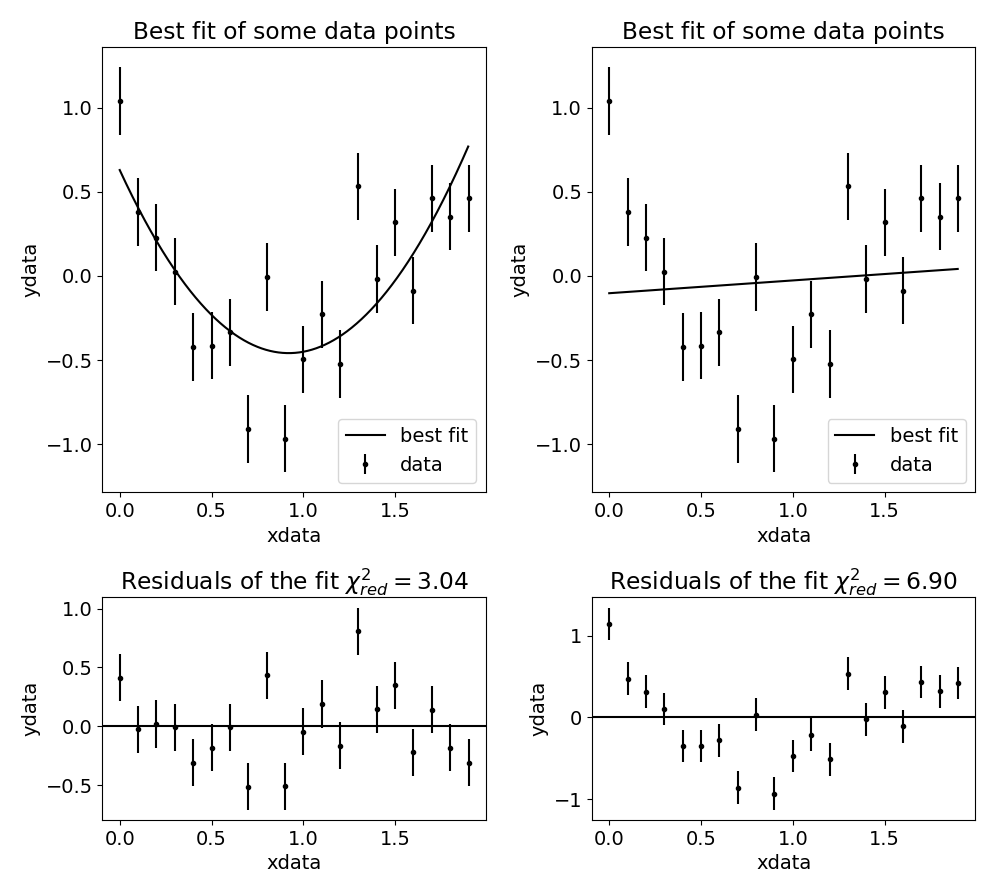

Here we have the opposite of the previous situation. The errorbars were reported too small for the plotting and fitting (compared with the generation of the data). Technically, both fits are "bad" due to the large $\chi_{red}^2$ values. But looking at the residual plots for both makes it pretty clear that the errorbars are too small. The pattern on the residual for the plot on the right has a clear pattern (low in the middle, high at the ends, looks almost parabolic), so that function is unlikely to be correct. 



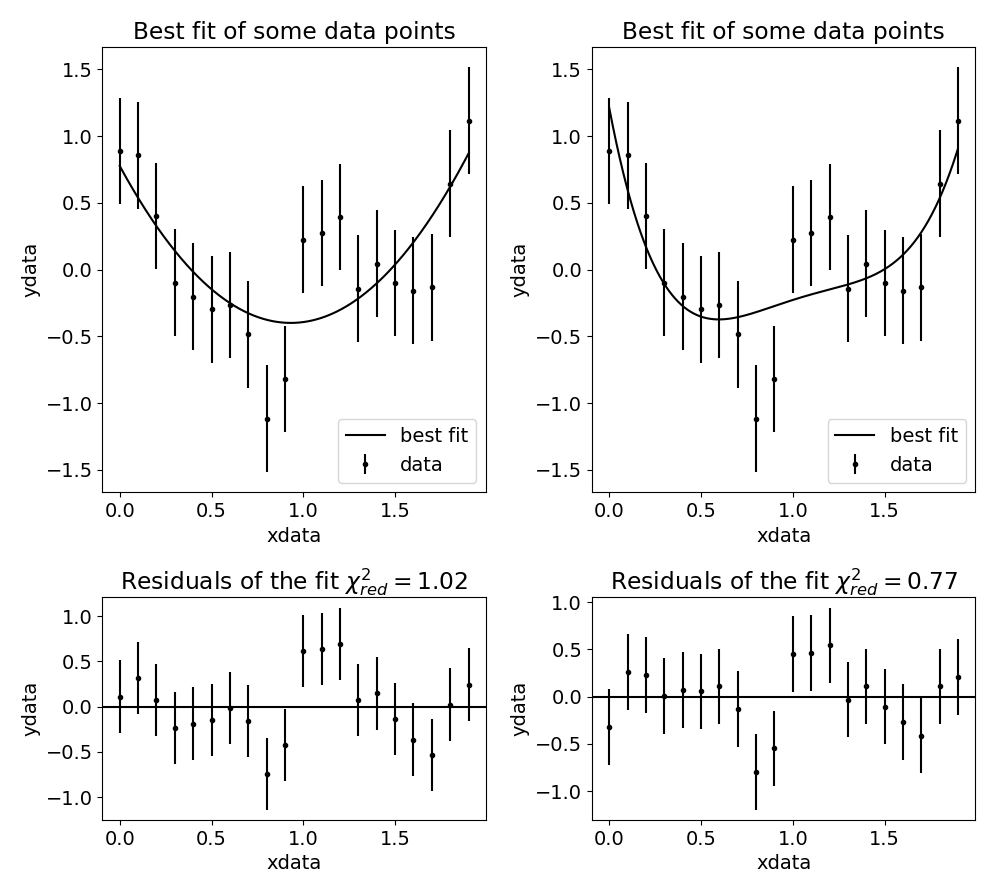

Here we have a situation where we are "fitting noise." The graph on the right has the lower $\chi_{red}^2$ score, but that does not make it the better fit. In this case, the fact that that $\chi_{red}^2 < 1$ is indicative of over-fitting. Adding more parameters to a fit (such as changing a quadratic into a quartic function) will almost always reduce your $\chi_{red}^2$ value, but you need to be careful that you're not "fitting noise" by doing this. In general, 3 or fewer fitting parameters are unlikely to get you into a "fitting noise" situation. 

## Code

Here's the code used to generate the graphs. The first two parameters (y_noise and fudge) are what you should play with. See what happens when you have noisy data or clean data (y_noise value), and see what happens when you over-estimate or under-estimate your uncertainties (fudge value). Try to understand the following:

1) What causes $\chi_{red}^2 \ll 1$ and $\chi_{red}^2 \gg 1$.
2) How to estimate the value of $\chi_{red}^2$ just by looking at the residuals plot.
3) How to identify a pattern in the residuals that hints that a fit is missing something.
4) How to identify when estimated uncertainties are likely too large or too small (use the fudge parameter).

Finally, I recommend you change the linear function to be a quartic or quintic function and see what happens. This will often lead you to situations where you are "fitting noise". You will generally get a smaller $\chi_{red}^2$ value that way, but once again the $\chi_{red}^2$ value is NOT the only indicator about whether a fit is good or not.

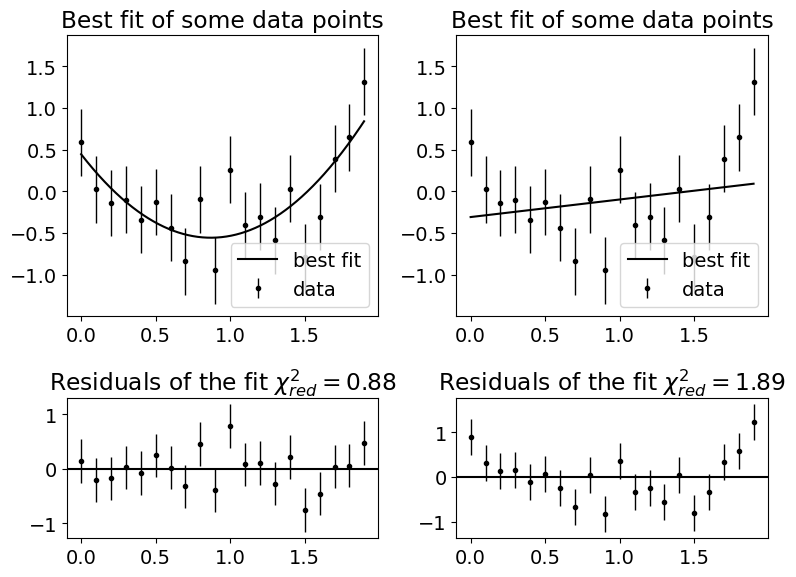

In [3]:
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
from pylab import loadtxt

y_noise = 0.4
fudge = 1.0

def linear(t, m, b):
    return m*t + b

def quadratic(t, a, b, c):
    return a*t**2 + b*t + c

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 8,6

my_func = quadratic
my_param = (1.3, -2.4, 0.6)

xdata = np.arange(0,2,0.1)
ys = my_func(xdata, *my_param)

noise = np.random.normal(0, y_noise, (len(xdata)))
ydata = ys + noise
yerror = np.ones(len(xdata)) * y_noise * fudge

popt, pcov = optimize.curve_fit(my_func, xdata, ydata, sigma=yerror, p0=my_param)
        
start = min(xdata)
stop = max(xdata)    
xs = np.arange(start,stop,(stop-start)/1000) 
curve = my_func(xs, *popt) 
    
fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [2, 1]})
ax1.errorbar(xdata, ydata, yerr=yerror, fmt=".", label="data", color="black", lw=1)
ax1.plot(xs, curve, label="best fit", color="black")
ax1.legend(loc='lower right')

ax1.set_title("Best fit of some data points")
    
residual = ydata - my_func(xdata, *popt)
chi2a = sum((residual/yerror)**2)/(len(xdata)-3)

ax2.errorbar(xdata, residual, yerr=yerror, fmt=".", color="black", lw=1)
ax2.axhline(y=0, color="black")    
    
ax2.set_title(r"Residuals of the fit $\chi_{red}^2 =$" + str(chi2a)[:4])

my_func = linear

popt, pcov = optimize.curve_fit(my_func, xdata, ydata, sigma=yerror)
        
start = min(xdata)
stop = max(xdata)    
xs = np.arange(start,stop,(stop-start)/1000) 
curve = my_func(xs, *popt) 
    
ax3.errorbar(xdata, ydata, yerr=yerror, fmt=".", label="data", color="black", lw=1)
ax3.plot(xs, curve, label="best fit", color="black")
ax3.legend(loc='lower right')

ax3.set_title("Best fit of some data points")
    
residual = ydata - my_func(xdata, *popt)
ax4.errorbar(xdata, residual, yerr=yerror, fmt=".", color="black", lw=1)
ax4.axhline(y=0, color="black")    
chi2b = sum((residual/yerror)**2)/(len(xdata)-2)

ax4.set_title(r"Residuals of the fit $\chi_{red}^2 =$" + str(chi2b)[:4])

fig.tight_layout()
plt.show()

## Chi-Squared probability

The chi-squared probability can be calculated in Python using

goodness_of_fit = (1-chi2.cdf(chisquared,dof))

where chisquared is $\chi_{red}^2$, and dof is the number of degrees of freedom, as defined before (number of data points minus number of fitting parameters).

Below is some code that generates 100 data sets, calculates their goodness_of_fit probability and their $\chi_{red}^2$, then plots each fitting's goodness_of_fit as a function of how many fittings had a smaller value. The first graph is an example of one of the data sets with its fit so you can see that it's working correctly. Note: we have not explained why the uncertainties should be the square root of the count. That is explained in another document.

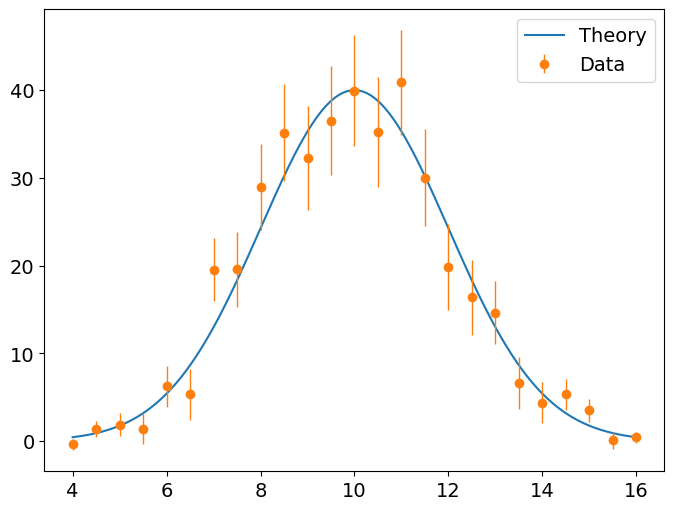

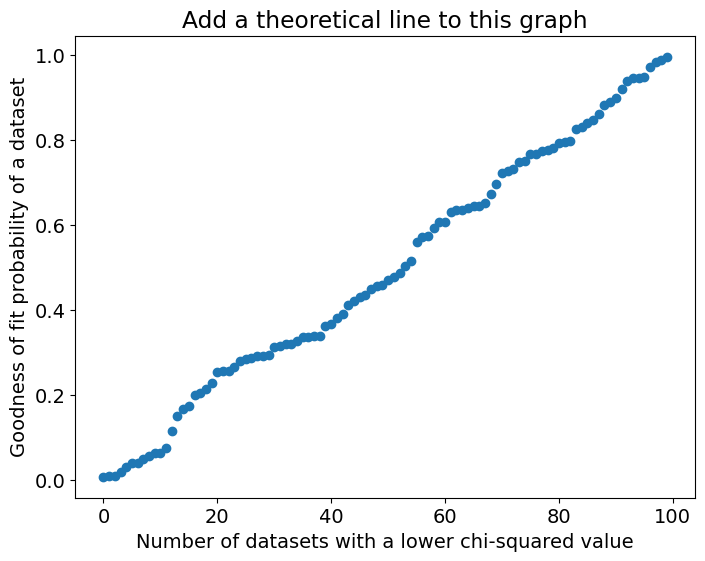

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
from random import random

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 8,6

def Gauss(x, amp, mean, width):
    return amp*np.exp(-(x-mean)**2/(2*width**2))

amp=40
mean=10
width=2

def GenerateRandomData(x):
    y_data = Gauss(x,amp,mean,width)
    y_err = np.sqrt(y_data)
    y_err = np.where(y_err==0,1,y_err)
    y_noise = np.random.normal(0,y_err)
    return y_data+y_noise, y_err

x_theory = np.linspace(mean-3*width,mean+3*width,1000)
y_theory = Gauss(x_theory, amp, mean, width)
plt.plot(x_theory,y_theory,label="Theory")

x = np.linspace(mean-3*width,mean+3*width,1+12*width) 
y, y_err = GenerateRandomData(x)
plt.errorbar(x,y,y_err,ls="",marker="o",label="Data",lw=1)
plt.legend()
plt.show()

num = 100
chis = np.zeros(num)
g_of_fit = np.zeros(num)

for i in range(num):
    y, y_err = GenerateRandomData(x)
    p_opt, p_cov = curve_fit(Gauss, x, y, sigma=y_err, p0=(amp,mean,width), absolute_sigma=True)
    y_fit = Gauss(x, *p_opt)
    chisquared = np.sum( ((y - y_fit)/y_err )**2)
    dof = len(x) - len(p_opt)
    goodness_of_fit = (1-chi2.cdf(chisquared,dof))
    chis[i] = chisquared
    g_of_fit[i] = goodness_of_fit

rank = np.zeros(num)
for i in range(num):
    sum = 0
    for j in range(num):
        if chis[i] < chis[j]: sum += 1 
    rank[i] = sum   

plt.scatter(rank,g_of_fit)

plt.title("Add a theoretical line to this graph")
plt.xlabel("Number of datasets with a lower chi-squared value")
plt.ylabel("Goodness of fit probability of a dataset")
plt.show()

